In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
df = pd.read_csv('./content/housing.csv', header=None)
df.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [6]:
house_price_dataset = sklearn.datasets.load_boston()

In [10]:
house_price_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [11]:
df_house_price = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [12]:
df_house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# add the target(price) column to the dataframe

df_house_price['Price']  = house_price_dataset.target

In [14]:
df_house_price

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
# Check for missing values
df_house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [17]:
# Statistical measures of data

df_house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various feature in the dataset

1- Positive Correlation
2- Negative Correlation

In [18]:
correlation = df_house_price.corr()

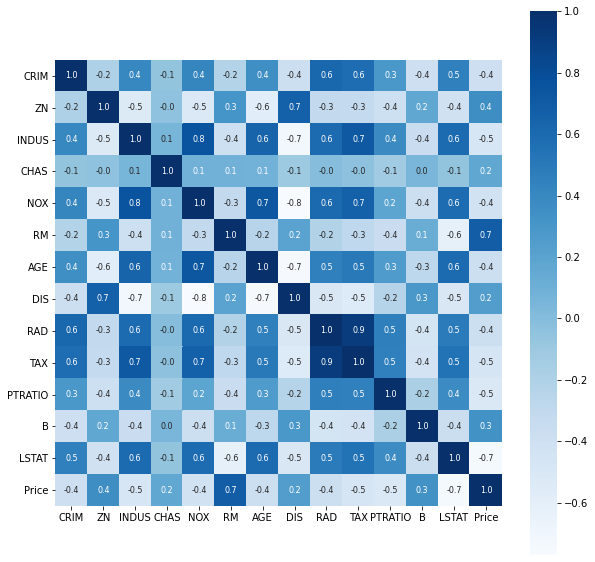

In [20]:
# Constructing the heatmaps to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot = True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [21]:
x= df_house_price.drop(columns='Price', axis = 1)
y = df_house_price.Price

print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

In [22]:
x.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [24]:
# Splitting the data into train and test data

x_train,x_test, y_train,y_test = train_test_split(x, y, test_size =0.2, random_state =2)

In [25]:
print(x_train.shape, x_test.shape)

(404, 13) (102, 13)


Model Training using xgboost regressor model

In [26]:
# Load the model

xgrboost_model = XGBRegressor()

#Fit the train data or train the model data

xgrboost_model.fit(x_train, y_train)



[18:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [33]:
# Prediction on training data
training_prediction = xgrboost_model.predict(x_train)

print(training_prediction)



[23.360205  22.462858  20.84804   33.77895   15.333282  13.616525
 21.71274   15.175322  11.724756  21.836252  16.08508    7.52517
 31.094206  48.56228   32.623158  20.546066  22.177324  20.500404
 31.666502  20.551508  25.74269    8.247894  45.200817  22.069397
 20.698004  20.100042  19.873472  26.242834  23.39618   31.927258
 21.493471   9.280926  18.504272  21.87202   12.504413  10.578829
 13.054951  23.541336  19.164755  15.888303  23.768887  28.454714
 15.539753  18.049202  16.23671   14.08383   25.33273   17.575668
 49.566467  16.990675  21.738977  32.935143  16.125738  22.45393
 20.776966  20.042227  22.898897  38.124043  30.607079  32.607468
 20.919416  47.348038  14.524615   8.126455  19.581661   9.030508
 26.462107  17.69918   20.546162  46.312218  39.689137  34.387108
 22.11083   34.568977  24.873934  50.078335  14.5669775 20.525211
 20.62971   23.202105  49.514477  23.12061   24.795782  20.319666
 43.869396  17.110266  32.165016  34.75202    7.313497  20.309446
 18.038298  

In [29]:
#Evaluating the model

# 1. R Squeared Error

score_r_squared = metrics.r2_score(y_train, training_prediction)
print(score_r_squared)

# 2.  Mean Absolute error

score_mean_abs = metrics.mean_absolute_error(y_train, training_prediction)

print(score_mean_abs)



0.9733349094832763
1.145314053261634


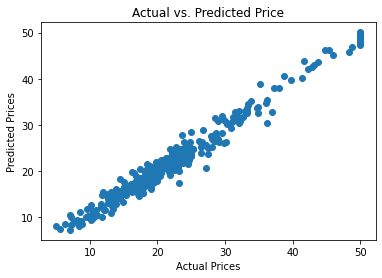

In [34]:
#Visualizing the actual prices and predicted prices

plt.scatter(y_train,training_prediction )
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Price")
plt.show()

In [31]:
# Prediction on test data
test_prediction = xgrboost_model.predict(x_test)

print(test_prediction)

[19.862686  20.875359  33.17797   27.382437   8.670393  12.749035
 24.892832  28.360075  24.255108  21.072632  26.47432   23.733467
 19.937876  20.904943  11.981489  21.96157   18.912077  11.756731
  7.6664963 15.348703  22.421118  20.452726  35.121113  18.995922
 14.649773  19.7423    46.987373  31.679413  33.486717  19.149603
 16.978365  19.986921  29.671926  25.908306  12.054155  19.783747
 11.48538   20.736174  21.28781   22.159164  24.212786  14.06105
 31.836473   8.498605  19.9131    15.15852   34.853638  16.41293
 32.33093   11.683373  29.010166  27.483522   7.4060163 36.29048
 26.685335  19.16574   18.62919   18.594267  15.957146  20.692377
 18.621147  20.87898   18.639454  31.751453  34.53461   24.462927
 48.532074  25.695988  11.561405  22.441519  13.844913   8.819357
 18.711916  17.386942  25.362583  24.995708  21.686417  21.840801
 20.210482  23.037663  34.230244  17.989033  19.622482  29.318424
 47.41502   34.988304  18.88605   23.692265  29.01938   19.878334
 20.244999  1

In [32]:
#Evaluating the model with test data

# 1. R Squeared Error

score_r_squared_test = metrics.r2_score(y_test, test_prediction)
print(score_r_squared_test)

# 2.  Mean Absolute error

score_mean_abs_test = metrics.mean_absolute_error(y_test, test_prediction)

print(score_mean_abs_test)

0.9115937697657654
1.9922956859364223
